# Practice Goals for this Version:

1. Make iterative experiments and see how they affect the final score -- "Edisonian" appoarch.
2. What happens if I remove year built and just keep year remod?

# Debrief
1. Yep, 0.8 worse, year built is pretty important.

In [29]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


# Data Exploration
Let's load the data, check statistic summary and do a few visualizations.

In [30]:
train = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [31]:
test = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [32]:
submission = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv")
submission.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [33]:
# Read and print entire file
with open('/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt', 'r') as file:
    content = file.read()
    print(content)

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Feature Selection

In [35]:
#train.MSSubClass.plot(kind="hist", bins=30)
#train['MSZoning'].value_counts().plot(kind='bar')
#train.LotFrontage.plot(kind="hist", bins=30)
#train.LotArea.plot(kind="hist", bins=30)
#train['Street'].value_counts().plot(kind='bar')
#train['Alley'].value_counts().plot(kind='bar')
#train['LotShape'].value_counts().plot(kind='bar')
#train['LandContour'].value_counts().plot(kind='bar')
#train['Utilities'].value_counts().plot(kind='bar')
#train['LotConfig'].value_counts().plot(kind='bar')
#train['LandSlope'].value_counts().plot(kind='bar')
#train['Neighborhood'].value_counts().plot(kind='bar')
#train['Condition1'].value_counts().plot(kind='bar')
#train['Condition2'].value_counts().plot(kind='bar')
#train['BldgType'].value_counts().plot(kind='bar')
#train['OverallQual'].value_counts().plot(kind='bar')
#train['OverallCond'].value_counts().plot(kind='bar')
#train['YearBuilt'].value_counts().plot(kind='bar')
#train['YearRemodAdd'].value_counts().plot(kind='bar')
#train['RoofStyle'].value_counts().plot(kind='bar')
#train['1stFlrSF'].plot(kind="hist", bins=30)
#train['2ndFlrSF'].plot(kind="hist", bins=30)
#train['LowQualFinSF'].plot(kind="hist", bins=30)
#train['BsmtHalfBath'].plot(kind="hist", bins=30)
#train['FullBath'].plot(kind="hist", bins=30)
#train['KitchenQual'].plot(kind="hist", bins=30)
#train['PoolArea'].value_counts().plot(kind='bar')
#train['PoolQC'].value_counts().plot(kind='bar')
#train['MiscFeature'].value_counts().plot(kind='bar')
#train['MoSold'].value_counts().plot(kind='bar')
#train['YrSold'].value_counts().plot(kind='bar')
#train['SaleCondition'].value_counts().plot(kind='bar')
#train['OverallQual'].value_counts().plot(kind='bar')
#train['FullBath'].value_counts().plot(kind='bar')
#train['GrLivArea'].plot(kind="hist", bins=30)

#train['SalePrice'].plot(kind="hist", bins=30)


After checking all 80 features for this version I'll cut off most of them. 

Obviously, in the next versions I'll do much more feature engineering, PCA etc.

Here's my initial list of features:
- MSSubClass ‒ very high unique info.
- LotArea ‒ crazy outlier
- Neighborhood
- HouseStyle
- OverallQual ‒ check if 5&6 are highly correlated.
- OverallCond ‒ check if 5&6 are highly correlated.
- YearBuilt 
- YearRemodAdd ‒ weird data with 1950s
- TotalBsmtSF ‒ crazy outlier
- GrLivArea
- FullBath ‒ little unique info, most are in 2, 1 answer?
- BedroomAbvGrd
- TotRmsAbvGrd
- GarageArea ‒ just more info in the feature.
- YrSold

I also had MiscFeature, then realized MiscVal is more useful, then realized the whole feature is responsible for a minute difference in price variance, so removed it.

In [36]:
kept_features = [
    'MSSubClass',
    'LotArea',
    'Neighborhood',
    'HouseStyle',
    'OverallQual',
    'OverallCond',
    #'YearBuilt',
    'YearRemodAdd',
    'TotalBsmtSF',
    'GrLivArea',
    'FullBath',
    'BedroomAbvGr',
    'TotRmsAbvGrd',
    'GarageArea',
    'YrSold',
    'SalePrice'
]

train_cut = train.filter(items=kept_features)
#train_cut.head()

test_cut= test.filter(items=kept_features)
#test_cut.head()

# Handle Missing Values

Out of selected features, only train set has one missing GarageArea and TotalBsmtSF. I'll apply mean imputation to both. In future version use similar values to the houses with the same prices.

In [37]:
# #train['MiscFeature'].value_counts().plot(kind='bar')
# train['MiscVal'].plot(kind="hist", bins=30)
# train['MiscVal'].describe()
# train[train['MiscVal'] != 0]['MiscVal'].describe()

test_cut['GarageArea'].fillna(test_cut['GarageArea'].mean(), inplace=True)
test_cut['TotalBsmtSF'].fillna(test_cut['TotalBsmtSF'].mean(), inplace=True)
test_cut.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    1459 non-null   int64  
 1   LotArea       1459 non-null   int64  
 2   Neighborhood  1459 non-null   object 
 3   HouseStyle    1459 non-null   object 
 4   OverallQual   1459 non-null   int64  
 5   OverallCond   1459 non-null   int64  
 6   YearRemodAdd  1459 non-null   int64  
 7   TotalBsmtSF   1459 non-null   float64
 8   GrLivArea     1459 non-null   int64  
 9   FullBath      1459 non-null   int64  
 10  BedroomAbvGr  1459 non-null   int64  
 11  TotRmsAbvGrd  1459 non-null   int64  
 12  GarageArea    1459 non-null   float64
 13  YrSold        1459 non-null   int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 159.7+ KB


/tmp/ipykernel_36/1365848598.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_cut['GarageArea'].fillna(test_cut['GarageArea'].mean(), inplace=True)
/tmp/ipykernel_36/1365848598.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value

In [38]:
train_cut.head(20)

,MSSubClass,LotArea,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,TotalBsmtSF,GrLivArea,FullBath,BedroomAbvGr,TotRmsAbvGrd,GarageArea,YrSold,SalePrice
0,60,8450,CollgCr,2Story,7,5,2003,856,1710,2,3,8,548,2008,208500
1,20,9600,Veenker,1Story,6,8,1976,1262,1262,2,3,6,460,2007,181500
2,60,11250,CollgCr,2Story,7,5,2002,920,1786,2,3,6,608,2008,223500
3,70,9550,Crawfor,2Story,7,5,1970,756,1717,1,3,7,642,2006,140000
4,60,14260,NoRidge,2Story,8,5,2000,1145,2198,2,4,9,836,2008,250000
5,50,14115,Mitchel,1.5Fin,5,5,1995,796,1362,1,1,5,480,2009,143000
6,20,10084,Somerst,1Story,8,5,2005,1686,1694,2,3,7,636,2007,307000
7,60,10382,NWAmes,2Story,7,6,1973,1107,2090,2,3,7,484,2009,200000
8,50,6120,OldTown,1.5Fin,7,5,1950,952,1774,2,2,8,468,2008,129900
9,190,7420,BrkSide,1.5Unf,5,6,1950,991,1077,1,2,5,205,2008,118000


# Analyzing each feature and what processing should be applied to it

1. ```MSSubClass``` -- Is higher better? Should I encode it? Should I bucketize it?
2. ```LotArea``` -- There are these 2-5 crazy ass outlier, should I kill it?
3. ```Neighborhood``` -- What How should I encode this, one-hot? Combine them somehow? Just literally look at the map and group them?
4. ```HouseStyle``` -- Just one-hot encode it? Combine them somehow?
5. ```OverallQual``` -- Seems like just scaling it is enough for the end.
6. ```OverallCond``` -- Seems like just scaling it is enough for the end.
7. ```YearBuilt``` -- How should I treat it given yearremodadd?
8. ```YearRemodAdd``` -- Just delete yearbuilt for the first version and then think how to feature engineer it?
9. ```GrLivArea``` -- seems pretty chill, just outlier cap and scaling.
10. ```FullBath``` -- Just scaling?
11. ```BedroomAbvGr``` -- Just scaling? Or cap bedrooms on 6-5?
12. ```TotRmsAbvGrd``` -- Just scaling? Or cap on 12-11?
13. ```GarageArea``` -- outlier cap, scaling, but also once again: how should I treat such spiky scenarios with zero instances?
14. ```YrSold``` -- just scaling?
15. ```SalePrice``` -- outlier capping and just scaling?

So for the first version I decided no outlier handling, just scaling and one-hot encoding for neighborhood and house style. (I was questioning one-hot encoding when features have so many categories, but Claude said it is okay.)

<Axes: ylabel='Frequency'>

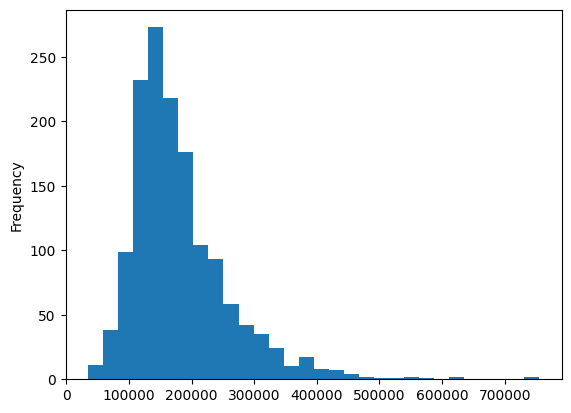

In [39]:
#train['SaleP'].value_counts().plot(kind='bar')
train['SalePrice'].plot(kind="hist", bins=30)
#train['LotArea'].describe()

#long_tail = train[train['LotArea'] > 20000]['LotArea']
#long_tail.plot(kind='hist', bins=30)

# Encode Categorical Variables

Learned that you don't need to convert booleans to numerical values because most sklearn algorithms do this automatically.

In [40]:
train_cut_encoded = pd.get_dummies(train_cut, columns=['HouseStyle', 'Neighborhood'], drop_first=True)
test_cut_encoded = pd.get_dummies(test_cut, columns=['HouseStyle', 'Neighborhood'], drop_first=True)
#train_cut_encoded.info()
test_cut_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 42 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MSSubClass            1459 non-null   int64  
 1   LotArea               1459 non-null   int64  
 2   OverallQual           1459 non-null   int64  
 3   OverallCond           1459 non-null   int64  
 4   YearRemodAdd          1459 non-null   int64  
 5   TotalBsmtSF           1459 non-null   float64
 6   GrLivArea             1459 non-null   int64  
 7   FullBath              1459 non-null   int64  
 8   BedroomAbvGr          1459 non-null   int64  
 9   TotRmsAbvGrd          1459 non-null   int64  
 10  GarageArea            1459 non-null   float64
 11  YrSold                1459 non-null   int64  
 12  HouseStyle_1.5Unf     1459 non-null   bool   
 13  HouseStyle_1Story     1459 non-null   bool   
 14  HouseStyle_2.5Unf     1459 non-null   bool   
 15  HouseStyle_2Story    

In [41]:
# Combine
combined = pd.concat([train_cut, test_cut], ignore_index=True)

# One-hot encoding
combined_encoded = pd.get_dummies(combined, columns=['HouseStyle', 'Neighborhood'], drop_first=False)

# Split back
train_cut_encoded = combined_encoded[combined_encoded['SalePrice'].notna()].copy()
test_cut_encoded = combined_encoded[combined_encoded['SalePrice'].isna()].drop('SalePrice', axis=1).copy()

print(f"Train shape: {train_cut_encoded.shape}")
print(f"Test shape: {test_cut_encoded.shape}")

Train shape: (1460, 46)
Test shape: (1459, 45)


# Scaling

In [42]:
# I'll use robustscaler due to the past 4.1 scaling notebook.

from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

cols_to_scale=  ['MSSubClass', 'LotArea','OverallQual', 'OverallCond', 
                 #'YearBuilt', 
                 'YearRemodAdd', 'TotalBsmtSF', 'GrLivArea', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'GarageArea', 'YrSold']

train_scaled_features = scaler.fit_transform(train_cut_encoded[cols_to_scale])
test_scaled_features = scaler.fit_transform(test_cut_encoded[cols_to_scale])

train_cut_encoded[cols_to_scale] = train_scaled_features
test_cut_encoded[cols_to_scale] = test_scaled_features

train_cut_encoded.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearRemodAdd,TotalBsmtSF,GrLivArea,FullBath,BedroomAbvGr,TotRmsAbvGrd,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,0.2,-0.254076,0.5,0.0,0.243243,-0.269652,0.380070,0.0,0.0,1.0,...,False,False,False,False,False,False,False,False,False,False
1,-0.6,0.030015,0.0,3.0,-0.486486,0.538308,-0.312090,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True
2,0.2,0.437624,0.5,0.0,0.216216,-0.142289,0.497489,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
3,0.4,0.017663,0.5,0.0,-0.648649,-0.468657,0.390885,-1.0,0.0,0.5,...,False,False,False,False,False,False,False,False,False,False
4,0.2,1.181201,1.0,0.0,0.162162,0.305473,1.134029,0.0,1.0,1.5,...,True,False,False,False,False,False,False,False,False,False


# Separating Data for Training and Testing

In [43]:
x_train = train_cut_encoded.drop("SalePrice", axis=1)
y_train = train_cut_encoded["SalePrice"]
x_test = test_cut_encoded

print(x_train)

      MSSubClass   LotArea  OverallQual  OverallCond  YearRemodAdd  \
0            0.2 -0.254076          0.5          0.0      0.243243   
1           -0.6  0.030015          0.0          3.0     -0.486486   
2            0.2  0.437624          0.5          0.0      0.216216   
3            0.4  0.017663          0.5          0.0     -0.648649   
4            0.2  1.181201          1.0          0.0      0.162162   
...          ...       ...          ...          ...           ...   
1455         0.2 -0.385746          0.0          0.0      0.162162   
1456        -0.6  0.913167          0.0          1.0     -0.162162   
1457         0.4 -0.107831          0.5          4.0      0.324324   
1458        -0.6  0.058918         -0.5          1.0      0.054054   
1459        -0.6  0.113266         -0.5          1.0     -0.783784   

      TotalBsmtSF  GrLivArea  FullBath  BedroomAbvGr  TotRmsAbvGrd  ...  \
0       -0.269652   0.380070       0.0           0.0           1.0  ...   
1        

# Shortlisting models on k-fold cross validation scores


In [44]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define models
lr = LinearRegression()
ridge = Ridge(alpha=1.0, random_state=42)
lasso = Lasso(alpha=1.0, random_state=42)
knn = KNeighborsRegressor(n_neighbors=5)
rfr = RandomForestRegressor(n_estimators=100, random_state=42)
gbr = GradientBoostingRegressor(n_estimators=100, random_state=42)
svr = SVR(kernel='rbf')
xgb = XGBRegressor(n_estimators=100, random_state=42)

# Cross-validation with negative MSE (sklearn convention)
cv_scores_lr = cross_val_score(lr, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_scores_ridge = cross_val_score(ridge, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_scores_lasso = cross_val_score(lasso, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_scores_knn = cross_val_score(knn, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_scores_rfr = cross_val_score(rfr, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_scores_gbr = cross_val_score(gbr, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_scores_svr = cross_val_score(svr, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_scores_xgb = cross_val_score(xgb, x_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Print results (convert to positive RMSE)
print(f"Linear Regression - RMSE: {np.sqrt(-cv_scores_lr.mean()):.4f} (+/- {np.sqrt(cv_scores_lr.std()):.4f})")
print(f"Ridge            - RMSE: {np.sqrt(-cv_scores_ridge.mean()):.4f} (+/- {np.sqrt(cv_scores_ridge.std()):.4f})")
print(f"Lasso            - RMSE: {np.sqrt(-cv_scores_lasso.mean()):.4f} (+/- {np.sqrt(cv_scores_lasso.std()):.4f})")
print(f"KNN              - RMSE: {np.sqrt(-cv_scores_knn.mean()):.4f} (+/- {np.sqrt(cv_scores_knn.std()):.4f})")
print(f"Random Forest    - RMSE: {np.sqrt(-cv_scores_rfr.mean()):.4f} (+/- {np.sqrt(cv_scores_rfr.std()):.4f})")
print(f"Gradient Boost   - RMSE: {np.sqrt(-cv_scores_gbr.mean()):.4f} (+/- {np.sqrt(cv_scores_gbr.std()):.4f})")
print(f"SVR              - RMSE: {np.sqrt(-cv_scores_svr.mean()):.4f} (+/- {np.sqrt(cv_scores_svr.std()):.4f})")
print(f"XGBoost          - RMSE: {np.sqrt(-cv_scores_xgb.mean()):.4f} (+/- {np.sqrt(cv_scores_xgb.std()):.4f})")

Linear Regression - RMSE: 34654.6510 (+/- 21448.7227)
Ridge            - RMSE: 34621.1920 (+/- 21585.9266)
Lasso            - RMSE: 34652.0557 (+/- 21454.8634)
KNN              - RMSE: 33856.4899 (+/- 17044.9106)
Random Forest    - RMSE: 31276.0425 (+/- 14945.4180)
Gradient Boost   - RMSE: 28805.4174 (+/- 16080.4228)
SVR              - RMSE: 81342.6763 (+/- 31463.1481)
XGBoost          - RMSE: 31469.1751 (+/- 15415.2661)


# Finetuning

Gradient boost does the least worst on RMSE and its std is one of close 2nd lowest, so we it will be finetuned.

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Parameters for GradientBoostingRegressor
gbr_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
}

# Run grid search
gbr = GradientBoostingRegressor(random_state=42)
gbr_grid = GridSearchCV(
    gbr, 
    gbr_params, 
    cv=5, 
    scoring='neg_root_mean_squared_error',  # or 'r2'
    n_jobs=-1,
    verbose=1
)

gbr_grid.fit(x_train, y_train)

print(f"Best params: {gbr_grid.best_params_}")
print(f"Best RMSE: {-gbr_grid.best_score_:.4f}")

# Use the best model
best_gbr = gbr_grid.best_estimator_

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best params: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 200}
Best RMSE: 27831.1087


# Submission

In [46]:
# Predict on test data
test_preds = best_gbr.predict(x_test)

# Build Kaggle submission file
submission = pd.DataFrame({
    "Id": test['Id'],
    "SalePrice": test_preds
})

# Save to CSV
submission.to_csv("submission.csv", index=False)
print("Submission file created: submission.csv")

Submission file created: submission.csv
